In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Passengerid and name columns are just identifier columns. Need to be removed.

# EDA

In [3]:
df.shape

(891, 12)

Dataframe have 891 rows and 12 columns.

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Name, Sex, Ticket, Cabin, Embarked columns are of object type rest of the columns are numerical.

In [5]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

Survived, Sex, Pclass, SibSp, Parch and Embarked columns have categorical values rest are continuous.

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, Cabin and Embarked have missing values present

In [7]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Data is imbalanced

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Variance of Survived, Pclass, Pclass and Parch column is close to zero. Mean is greater than median in Pclass column, showing that data is skewed towards left, in rest of the columns data is skewed towards right as median is greater. Outliers seem to be present as min interquartile range and maximun ranged do not have same difference.

### Univariate Analysis

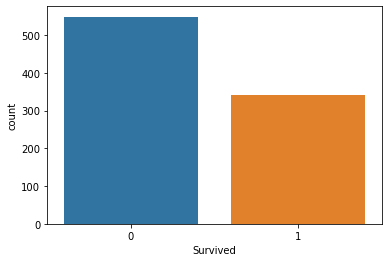

In [9]:
sns.countplot(df['Survived'])

There are more people that have died than people who survived.

In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

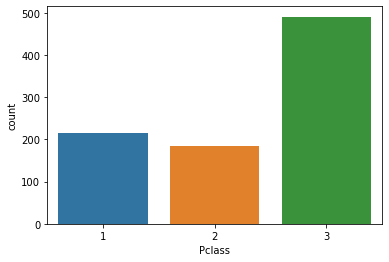

In [11]:
sns.countplot(df['Pclass'])

Most people travelled with 3rd class ticket followed by 1st class the 2nd class

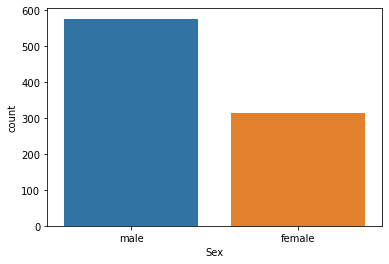

In [12]:
sns.countplot(df['Sex'])

There we almost double the number of male passengers than female

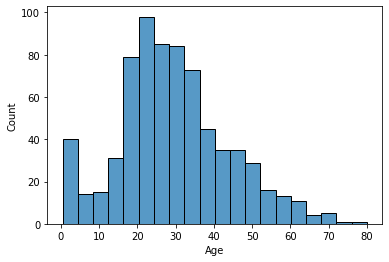

In [13]:
sns.histplot(df['Age'])

People with age between 20 to 30 were the majority among ages, while people also travelled with children of age below 5

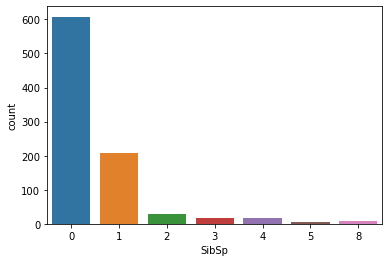

In [14]:
sns.countplot(df['SibSp'])

Mostly siblings or spouses travelling with each passenger were none, one or two but there were passengers present with 8 siblings also.

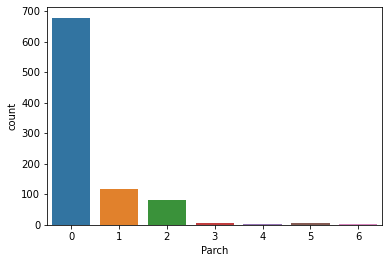

In [15]:
sns.countplot(df['Parch'])

Less than 120 passengers had parents/guardian travelling with them and with some there were 6 guardians with a single child.

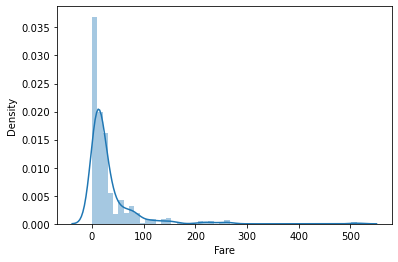

In [16]:
sns.distplot(df['Fare'])

Majority of the people had paid less than 100 for the fare whereas there were elite classes also present who had paid 500.

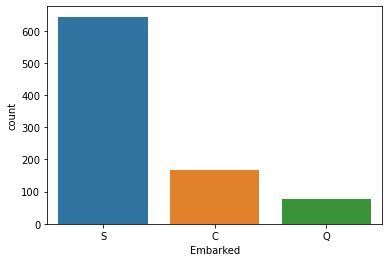

In [17]:
sns.countplot(df['Embarked'])

Most of the people boarded the ship from S harbor followed by C and least from Q

In [18]:
data=df.copy()
data.drop(['PassengerId','Name','Ticket','Cabin','Sex','Embarked','Survived','Pclass'],axis=1,inplace=True)
data.head()

,Age,SibSp,Parch,Fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500


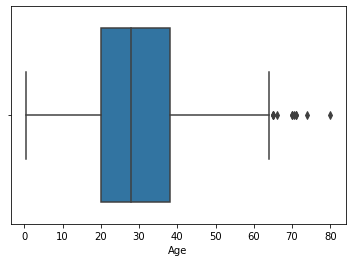

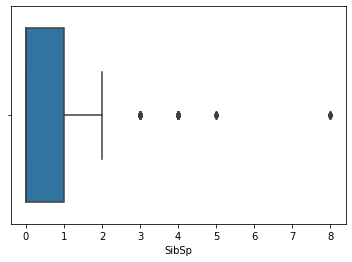

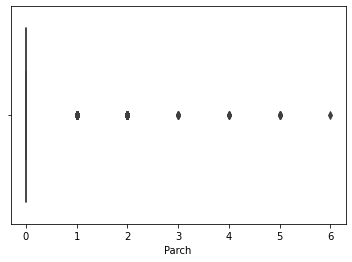

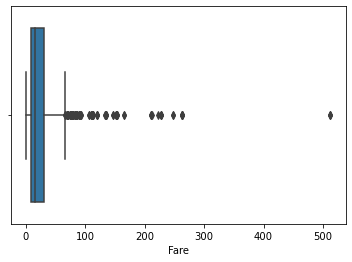

<Figure size 432x288 with 0 Axes>

In [19]:
for i in data.columns:
    sns.boxplot(data[i])
    plt.figure()

A large no. of outliers are present in Fare and Age.

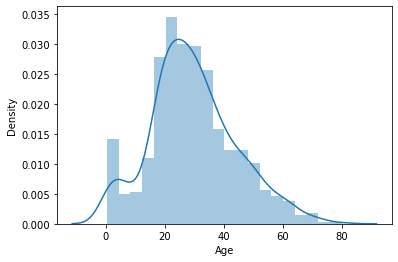

In [20]:
sns.distplot(data['Age'])

Data is almost normally distributed

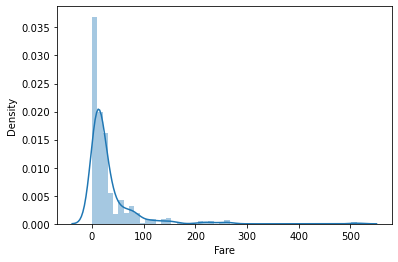

In [21]:
sns.distplot(data['Fare'])

Data skewed to the right

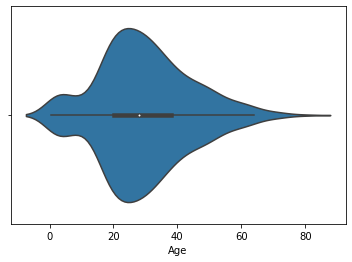

In [22]:
sns.violinplot(data['Age'])

Most passengers were from age between 20 and 40.

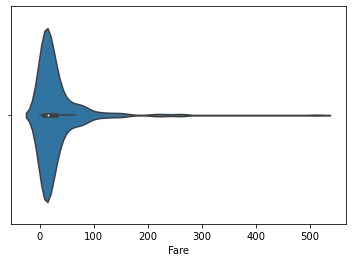

In [23]:
sns.violinplot(data['Fare'])

Most people paid fare less than 50 and some even paid 500

### Bivariate Analysis

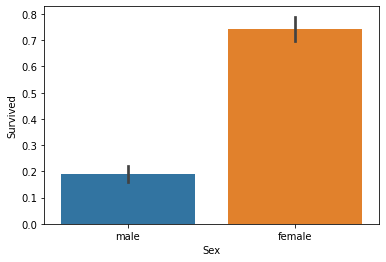

In [24]:
sns.barplot(x=df['Sex'],y=df['Survived'])

More than 70% women survived and less than 20% men survived

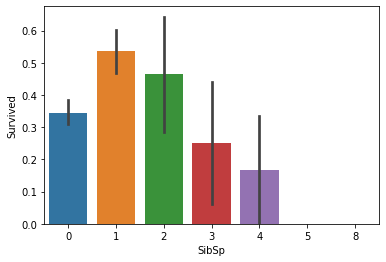

In [25]:
sns.barplot(x='SibSp',y='Survived',data=df)

Survival rate of passengers having one sibling or spouse was maximum.

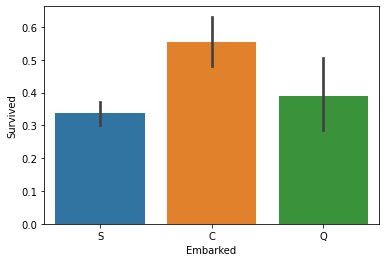

In [26]:
sns.barplot(x='Embarked',y='Survived',data=df)

People boarding from C harbor had most survival rate

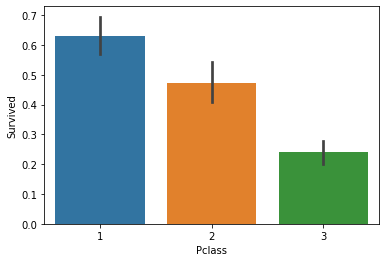

In [27]:
sns.barplot(x='Pclass',y='Survived',data=df)

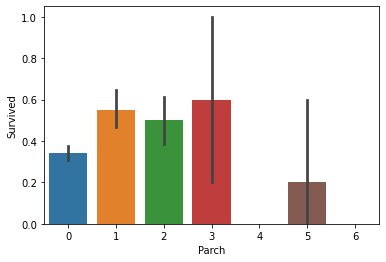

In [28]:
sns.barplot(x='Parch',y='Survived',data=df)

Survival rate of passenges having parents/guardians 1,2 or was more than 50%. Amost none of the passenger survived who had Parch 4 or 5.

### Multivariate Analysis

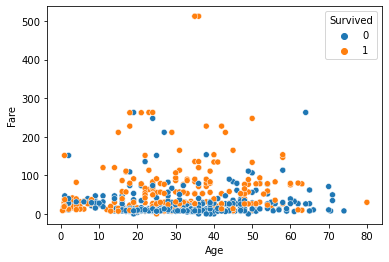

In [29]:
sns.scatterplot(x=df['Age'],y=df['Fare'],hue=df['Survived'])

Passesngers who had paid highe fares have survived the most

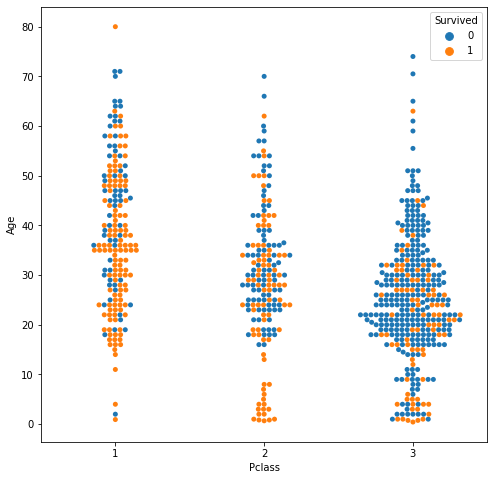

In [30]:
plt.figure(figsize=(8,8))
sns.swarmplot(x=df['Pclass'],y=df['Age'],hue=df['Survived'])

People from 1st class survived the most and almost all the children from 2 class survived while very few passengers survived from 3rd class

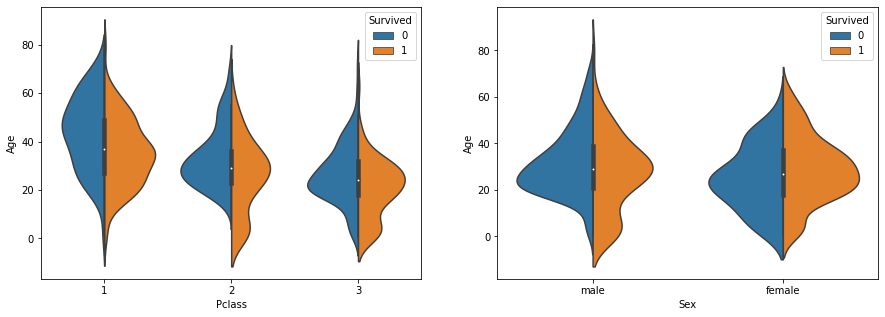

In [31]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df, split=True, ax=ax1)
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df, split=True, ax=ax2)

There are more old people in 1st class, most of the children srom 2nd class survived also children from 3rd also survived.
Most male children survived and women from 20 to 40 had much better survival rate.

<Figure size 576x576 with 0 Axes>

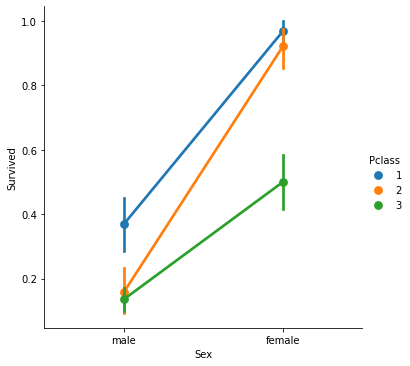

In [32]:
plt.figure(figsize=(8,8))
sns.factorplot(x='Sex', y='Survived', hue='Pclass', data=df)

Almost all Women from 1st and 2nd class survived whereas very few men survived from 1st class and least from 2nd and 3rd classes

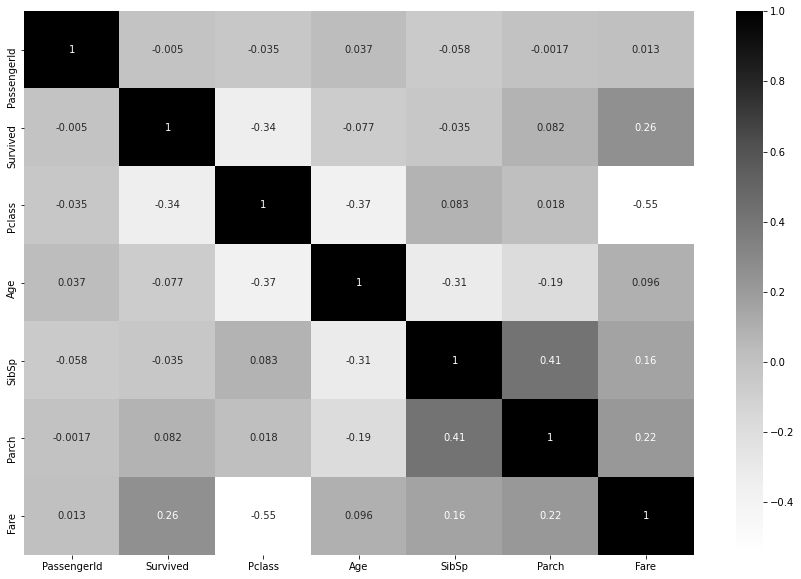

In [33]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='Greys')

Survived feature shows positive correlation with fare paid, and very little with parch column whereas it shows string negative correlation with Pclass.

# Feature Engineering

In [34]:
#Extracting titles from Name column
df['Title']=df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [35]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [36]:
pd.crosstab(df['Title'],df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Apart from tiles,there aare Mlle, Mme, and Ms we are misspelled

In [37]:
#We replace rarely ocuurling titles with 'rare'
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir',
                                   'Jonkheer', 'Dona'], 'Rare')

In [38]:
df['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Rare       23
Mlle        2
Mme         1
Ms          1
Name: Title, dtype: int64

In [39]:
df['Title'].replace(['Mlle','Ms'],'Miss',inplace=True)
df['Title'].replace('Mme','Mrs',inplace=True)
df['Title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64

Filling NaN Values

In [40]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [41]:
df['Embarked'].mode()

0    S
dtype: object

In [42]:
df['Embarked'].replace(np.NaN,'S',inplace=True)

In [43]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [44]:
#Since too many null values we drop this column
df.drop('Cabin',axis=1,inplace=True)

In [45]:
#We add another column by adding diblings and parent column
df['Family']=df['SibSp']+df['Parch']

In [46]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,0


In [47]:
#We drop the identifier columns
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [48]:
#we Encode Sex, Embarked and title column
from sklearn.preprocessing import OrdinalEncoder
e=OrdinalEncoder()

In [49]:
df['Sex']=e.fit_transform(df['Sex'].values.reshape(-1,1))
df['Title']=e.fit_transform(df['Title'].values.reshape(-1,1))
df['Embarked']=e.fit_transform(df['Embarked'].values.reshape(-1,1))

In [50]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family
0,0,3,1.0,22.0,1,0,7.2500,2.0,2.0,1
1,1,1,0.0,38.0,1,0,71.2833,0.0,3.0,1
2,1,3,0.0,26.0,0,0,7.9250,2.0,1.0,0
3,1,1,0.0,35.0,1,0,53.1000,2.0,3.0,1
4,0,3,1.0,35.0,0,0,8.0500,2.0,2.0,0


In [51]:
#We separate the data
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [52]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family
0,3,1.0,22.000000,1,0,7.2500,2.0,2.0,1
1,1,0.0,38.000000,1,0,71.2833,0.0,3.0,1
2,3,0.0,26.000000,0,0,7.9250,2.0,1.0,0
3,1,0.0,35.000000,1,0,53.1000,2.0,3.0,1
4,3,1.0,35.000000,0,0,8.0500,2.0,2.0,0
...,...,...,...,...,...,...,...,...,...
886,2,1.0,27.000000,0,0,13.0000,2.0,4.0,0
887,1,0.0,19.000000,0,0,30.0000,2.0,1.0,0
888,3,0.0,29.699118,1,2,23.4500,2.0,1.0,3
889,1,1.0,26.000000,0,0,30.0000,0.0,2.0,0


In [53]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [54]:
from imblearn.over_sampling import SMOTE
over=SMOTE()

In [55]:
x,y=over.fit_resample(x,y)

In [56]:
print(x.shape,y.shape)

(1098, 9) (1098,)


In [57]:
y.value_counts()

1    549
0    549
Name: Survived, dtype: int64

In [58]:
#We scale the independent variables
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [59]:
xd=scaler.fit_transform(x)
x=pd.DataFrame(xd,columns=x.columns)

In [60]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family
0,1.0,1.0,0.271174,0.125,0.0,0.014151,1.0,0.50,0.1
1,0.0,0.0,0.472229,0.125,0.0,0.139136,0.0,0.75,0.1
2,1.0,0.0,0.321438,0.000,0.0,0.015469,1.0,0.25,0.0
3,0.0,0.0,0.434531,0.125,0.0,0.103644,1.0,0.75,0.1
4,1.0,1.0,0.434531,0.000,0.0,0.015713,1.0,0.50,0.0


In [61]:
#We import Classification Models
from sklearn.naive_bayes import  GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [62]:
from sklearn.model_selection import train_test_split, cross_val_score

In [63]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [64]:
#Function to find the best random state
def randomstate(x,y):
    maxx=0
    model=LogisticRegression()
    for i in range(1,201):
        xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=i)
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        accu=accuracy_score(p,ytest)
        if accu>maxx:
            maxx=accu
            j=i
    return j

In [65]:
#To evakuate performances of all the models
def performance(p,ytest,m,xtest,s):
    print('------------------------------------',m,'------------------------------------')
    print('Accuracy',np.round(accuracy_score(p,ytest),4))
    print('----------------------------------------------------------')
    print('Mean of Cross Validation Score',np.round(s.mean(),4))
    print('----------------------------------------------------------')
    print('AUC_ROC Score',np.round(roc_auc_score(ytest,m.predict_proba(xtest)[:,1]),4))
    print('----------------------------------------------------------')
    print('Confusion Matrix')
    print(confusion_matrix(p,ytest))
    print('----------------------------------------------------------')
    print('Classification Report')
    print(classification_report(p,ytest))

In [66]:
models=[GaussianNB(),KNeighborsClassifier(),SVC(probability=True),LogisticRegression(),DecisionTreeClassifier(),
        RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),XGBClassifier(verbosity=0)]

In [67]:
#Creates and trains model from the models list
def createmodel(trainx,testx,trainy,testy):
    for i in models:
        model=i
        model.fit(trainx,trainy)
        p=model.predict(testx)
        score=cross_val_score(model,x,y,cv=10)
        performance(p,testy,model,testx,score)
        

In [68]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=randomstate(x,y))
createmodel(xtrain,xtest,ytrain,ytest)

------------------------------------ GaussianNB() ------------------------------------
Accuracy 0.8218
----------------------------------------------------------
Mean of Cross Validation Score 0.797
----------------------------------------------------------
AUC_ROC Score 0.878
----------------------------------------------------------
Confusion Matrix
[[113  23]
 [ 26 113]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       136
           1       0.83      0.81      0.82       139

    accuracy                           0.82       275
   macro avg       0.82      0.82      0.82       275
weighted avg       0.82      0.82      0.82       275

------------------------------------ KNeighborsClassifier() ------------------------------------
Accuracy 0.8291
----------------------------------------------------------
Mean of Cross Validation Score 0.8252
-----

Almost all models are giving same performance, still top performing models are SVC, AdaBoost, Random Forest, XGBoost and Gradient Boost. So we apply Hyperparameter tuning on them

### Hyperparameter Tuning

In [69]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=randomstate(x,y))

##### SVC

In [70]:
params={'C':[1,5,20,40,60],'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
            'degree':[1,2,3,4,5,6]}

In [71]:
g=RandomizedSearchCV(SVC(),params,cv=10,n_jobs=-2)

In [72]:
g.fit(xtrain,ytrain)

RandomizedSearchCV(cv=10, estimator=SVC(), n_jobs=-2,
                   param_distributions={'C': [1, 5, 20, 40, 60],
                                        'degree': [1, 2, 3, 4, 5, 6],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [73]:
print(g.best_params_)
print(g.best_score_)

{'kernel': 'rbf', 'degree': 1, 'C': 1}
0.8301204819277108


In [74]:
m=SVC(C=1,degree=1,kernel='rbf',probability=True)
m.fit(xtrain,ytrain)
p=m.predict(xtest)
score=cross_val_score(m,x,y,cv=10)
performance(p,ytest,m,xtest,score)

------------------------------------ SVC(C=1, degree=1, probability=True) ------------------------------------
Accuracy 0.8545
----------------------------------------------------------
Mean of Cross Validation Score 0.8353
----------------------------------------------------------
AUC_ROC Score 0.9072
----------------------------------------------------------
Confusion Matrix
[[129  30]
 [ 10 106]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.81      0.87       159
           1       0.78      0.91      0.84       116

    accuracy                           0.85       275
   macro avg       0.85      0.86      0.85       275
weighted avg       0.87      0.85      0.86       275



##### AdaBoost

In [75]:
params={'base_estimator':[SVC(),LogisticRegression(),DecisionTreeClassifier()],
      'n_estimators':[50, 100, 150, 200, 250, 300],
      'learning_rate':[0.0001,0.001,0.01,0.1,]}

In [76]:
g=GridSearchCV(AdaBoostClassifier(),params,cv=10)

In [77]:
g.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(),
             param_grid={'base_estimator': [SVC(), LogisticRegression(),
                                            DecisionTreeClassifier()],
                         'learning_rate': [0.0001, 0.001, 0.01, 0.1],
                         'n_estimators': [50, 100, 150, 200, 250, 300]})

In [78]:
print(g.best_params_)
print(g.best_score_)

{'base_estimator': DecisionTreeClassifier(), 'learning_rate': 0.1, 'n_estimators': 100}
0.8287540405524538


In [79]:
m=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),learning_rate=0.1,n_estimators=100)
m.fit(xtrain,ytrain)
p=m.predict(xtest)
score=cross_val_score(m,x,y,cv=10)
performance(p,ytest,m,xtest,score)

------------------------------------ AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.1,
                   n_estimators=100) ------------------------------------
Accuracy 0.8218
----------------------------------------------------------
Mean of Cross Validation Score 0.8216
----------------------------------------------------------
AUC_ROC Score 0.8688
----------------------------------------------------------
Confusion Matrix
[[112  22]
 [ 27 114]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       134
           1       0.84      0.81      0.82       141

    accuracy                           0.82       275
   macro avg       0.82      0.82      0.82       275
weighted avg       0.82      0.82      0.82       275



##### Random Forest

In [80]:
params={'n_estimators':[100, 200, 300, 400, 500],
            'criterion':['gini','entropty'],
            'max_depth':[None,1,2,3,4,5,6,7,8,9,10],
           'max_features':['int','float','auto','log2']}

In [81]:
g=GridSearchCV(RandomForestClassifier(),params,cv=10)

In [82]:
g.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropty'],
                         'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['int', 'float', 'auto', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [83]:
print(g.best_params_)
print(g.best_score_)

{'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'n_estimators': 500}
0.8519394651777843


In [84]:
m=RandomForestClassifier(criterion='gini', max_depth= None, max_features='auto', n_estimators=500)
m.fit(xtrain,ytrain)
p=m.predict(xtest)
score=cross_val_score(m,x,y,cv=10)
performance(p,ytest,m,xtest,score)

------------------------------------ RandomForestClassifier(n_estimators=500) ------------------------------------
Accuracy 0.8509
----------------------------------------------------------
Mean of Cross Validation Score 0.8389
----------------------------------------------------------
AUC_ROC Score 0.9143
----------------------------------------------------------
Confusion Matrix
[[121  23]
 [ 18 113]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       144
           1       0.83      0.86      0.85       131

    accuracy                           0.85       275
   macro avg       0.85      0.85      0.85       275
weighted avg       0.85      0.85      0.85       275



##### XGBoost

In [85]:
params={
 "learning_rate"    : [0.01,0.05, 0.10, 0.15, ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [86]:
g=GridSearchCV(XGBClassifier(),params,cv=10)

In [87]:
g.fit(xtrain,ytrain)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None

In [88]:
print(g.best_params_)
print(g.best_score_)

{'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 1}
0.8567881281222449


In [89]:
m=XGBClassifier(colsample_bytree=0.5, gamma= 0.3, learning_rate= 0.1, max_depth= 8, min_child_weight= 1)
m.fit(xtrain,ytrain)
p=m.predict(xtest)
score=cross_val_score(m,x,y,cv=10)
performance(p,ytest,m,xtest,score)

------------------------------------ XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) ------------------------------------
Accuracy 0.8582
----------------------------------------------------------
Mean of Cross Validation Score 0.8589
----------------------------------------------------------
AUC_ROC Score 0.9183
----------------------------------------------------------
Confusion Matrix
[[124  24]
 [ 15 112]]
--------------------------------------------------------

##### GradientBoost

In [90]:
params={'n_estimators':[100,200,300,400,500],
      'loss':['deviance', 'exponential'],
      'learning_rate':[0.05, 0.10, 0.15, 0.20],
      'subsample':[0.5,1],
      'criterion':['friedman_mse', 'mse', 'mae'],
      'max_depth':[1,2,3,4,5,6,7,8,9]}

In [91]:
g=RandomizedSearchCV(GradientBoostingClassifier(),params,cv=10)

In [92]:
g.fit(xtrain,ytrain)

RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(),
                   param_distributions={'criterion': ['friedman_mse', 'mse',
                                                      'mae'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'loss': ['deviance', 'exponential'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                      9],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 1]})

In [93]:
print(g.best_params_)
print(g.best_score_)

{'subsample': 1, 'n_estimators': 200, 'max_depth': 5, 'loss': 'exponential', 'learning_rate': 0.05, 'criterion': 'friedman_mse'}
0.849485747869527


In [95]:
m=GradientBoostingClassifier(subsample=1,n_estimators=200,max_depth= 5,loss='exponential',learning_rate= 0.05,criterion='friedman_mse')
m.fit(xtrain,ytrain)
p=m.predict(xtest)
score=cross_val_score(m,x,y,cv=10)
performance(p,ytest,m,xtest,score)

------------------------------------ GradientBoostingClassifier(learning_rate=0.05, loss='exponential', max_depth=5,
                           n_estimators=200, subsample=1) ------------------------------------
Accuracy 0.8364
----------------------------------------------------------
Mean of Cross Validation Score 0.8662
----------------------------------------------------------
AUC_ROC Score 0.8983
----------------------------------------------------------
Confusion Matrix
[[122  28]
 [ 17 108]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.81      0.84       150
           1       0.79      0.86      0.83       125

    accuracy                           0.84       275
   macro avg       0.84      0.84      0.84       275
weighted avg       0.84      0.84      0.84       275



Hence the model for our problem seems to be XGBClassifier 

### Finalizing the model

In [96]:
model=XGBClassifier(colsample_bytree=0.5, gamma= 0.3, learning_rate= 0.1, max_depth= 8, min_child_weight= 1)
model.fit(xtrain,ytrain)
p=model.predict(xtest)
score=cross_val_score(model,x,y,cv=10)

### Evaluation Metrics

In [97]:
performance(p,ytest,model,xtest,score)

------------------------------------ XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) ------------------------------------
Accuracy 0.8582
----------------------------------------------------------
Mean of Cross Validation Score 0.8589
----------------------------------------------------------
AUC_ROC Score 0.9183
----------------------------------------------------------
Confusion Matrix
[[124  24]
 [ 15 112]]
--------------------------------------------------------

In [98]:
fpred=pd.Series(model.predict_proba(xtest)[:,1])
fpr,tpr,threshold=roc_curve(ytest,fpred)

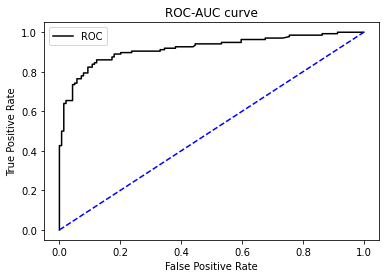

In [99]:
plt.plot(fpr,tpr,color='k',label='ROC')
plt.plot([0,1],[0,1],color='b',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC curve')
plt.legend()

### Saving the model

In [100]:
import joblib
joblib.dump(model,'titanic_prediction.obj')

['titanic_prediction.obj']